# 匯入模組

```
pip install pandas
pip install jieba
pip install GoogleNews
pip install matplotlib
pip install Pillow
pip install numpy
pip install scipy
pip install wordcloud
```

In [1]:
# 匯入模組
import pandas as pd
import jieba
from GoogleNews import GoogleNews
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image
import numpy as np
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator


需要知道的觀念和套件：

1. Pandas 資料處理
2. GoogleNews 爬蟲套件
3. WordCloud 文字雲套件
4. Image.open 讀取圖片
5. numpy 陣列操作
6. jieba 斷詞套件
7. datetime 日期處理


# 初始化 Google News 物件

In [2]:
# Google News初始化設定
googlenews = GoogleNews(lang='zh-tw', region='TW', encode='utf-8', period='1d')

# 啟用異常處理
googlenews.enableException(True)

# 使用者輸入關鍵字

In [3]:
# 使用者輸入關鍵字
# keyword = input("請輸入要搜尋的關鍵字: ")
keyword = "柯文哲"
googlenews.search(keyword)


# 顯示搜尋結果

In [4]:
# 獲取搜尋結果
result = googlenews.result()

# 顯示新聞標題和連結
for item in result:
    print(f"標題: {item['title']}")
    print(f"連結: {item['link']}")
    print('---')

標題: 沈政男稱柯文哲如同「美麗島受難者」 楊斯棓怒轟：褻瀆！
連結: https://news.ltn.com.tw/news/politics/breakingnews/4801156&ved=2ahUKEwjbioGgt8WIAxUsb_UHHZtYI7oQxfQBegQIARAC&usg=AOvVaw2ghIlFu-BLuYYWHUEkNE9s
---
標題: 綠媒又翻車了! 爆料黃景茂自白記錄 柯文哲親簽送都審會? 介文汲:無法無天
連結: https://www.youtube.com/watch%3Fv%3DsEaIeMrddBE&ved=2ahUKEwjbioGgt8WIAxUsb_UHHZtYI7oQxfQBegQICRAC&usg=AOvVaw1VWcBud7M1s_AwQ4FyURy2
---
標題: 聯合報社論／小草集結難證柯文哲清白，卻凸顯司法荒唐| 社論 | 評論 | 聯合新聞網
連結: https://udn.com/news/story/7338/8230303&ved=2ahUKEwjbioGgt8WIAxUsb_UHHZtYI7oQxfQBegQIAxAC&usg=AOvVaw2Ripj5wpYE6-NFQEFlGk43
---
標題: 批民眾黨瞎挺柯文哲 簡舒培4點質疑：全黨甘作法盲
連結: https://news.ltn.com.tw/news/politics/breakingnews/4801171&ved=2ahUKEwjbioGgt8WIAxUsb_UHHZtYI7oQxfQBegQIBhAC&usg=AOvVaw3i-3ilnHxmFI_Hep-P9TI9
---
標題: 愛莉莎莎尼泊爾「內觀」有感而發 首談柯文哲14字真心話曝光
連結: https://www.mirrormedia.mg/story/20240915edi011&ved=2ahUKEwjbioGgt8WIAxUsb_UHHZtYI7oQxfQBegQIBRAC&usg=AOvVaw0j0fvq_QoWMUu_yiqNE9bD
---
標題: 白營製圖文護航柯文哲 林智群列3吐槽點：當大家文盲？
連結: https://news.ltn.com.tw/news/politics/breakingnews/4801138&ved=2ahUKEwjb

# 停用詞過濾

In [5]:
# 讀取停用詞
with open(r'./stopword.txt', 'r', encoding='utf-8') as file:
    stopword = file.read().splitlines() # BIF splitlines
    # print(stopword)

# 加入 \n 換行方便閱讀
all_titles = "\n".join([item['title'] for item in result])
print("原始標題:")
print(all_titles)
# print(type(all_titles))
# print("--"*60)
# seg_list = jieba.cut(all_titles)
# print(type(seg_list))
print("斷詞結果:")
seg_list = jieba.lcut(all_titles)
print(seg_list)
print("--"*60)


import re

def is_english(text):
    return bool(re.match('^[a-zA-Z]+$', text))

# filtered_words = [word.strip() for word in seg_list if word.strip() not in stopword]
# 過濾停用詞和空白字符
filtered_words = []
for word in seg_list:
    # 去除詞的前後空白
    cleaned_word = word.strip()
    # 檢查詞是否為空且不在停用詞列表中
    if cleaned_word and cleaned_word not in stopword and not is_english(cleaned_word):
        filtered_words.append(cleaned_word)
print('加入停用詞: ')
print("".join(filtered_words))
print("--"*60)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/bq/x7m_syf57yz69kw1ysgwhbv40000gp/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/bq/x7m_syf57yz69kw1ysgwhbv40000gp/T/jieba.cache


原始標題:
沈政男稱柯文哲如同「美麗島受難者」 楊斯棓怒轟：褻瀆！
綠媒又翻車了! 爆料黃景茂自白記錄 柯文哲親簽送都審會? 介文汲:無法無天
聯合報社論／小草集結難證柯文哲清白，卻凸顯司法荒唐| 社論 | 評論 | 聯合新聞網
批民眾黨瞎挺柯文哲 簡舒培4點質疑：全黨甘作法盲
愛莉莎莎尼泊爾「內觀」有感而發 首談柯文哲14字真心話曝光
白營製圖文護航柯文哲 林智群列3吐槽點：當大家文盲？
動員力下降！小草上街人數減 國際連署半月不到5萬份
柯文哲案是否會衝擊立院藍白合作？沈富雄吐6字
黃珊珊拿國土署"護航柯文哲"翻車馬德:跟陳佩琪一樣先閉嘴!【馬德有事嗎】精華版@中天新聞CtiNews
黃珊珊搬國土署「京華城容獎符規定」 綠營批企圖混淆：替柯文哲解套
斷詞結果:


Loading model cost 0.388 seconds.
DEBUG:jieba:Loading model cost 0.388 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


['沈政', '男稱', '柯文', '哲', '如同', '「', '美麗島', '受', '難者', '」', ' ', '楊斯', '棓', '怒', '轟', '：', '褻瀆', '！', '\n', '綠媒', '又', '翻車', '了', '!', ' ', '爆料', '黃', '景茂', '自白', '記錄', ' ', '柯文', '哲親', '簽送', '都', '審會', '?', ' ', '介文', '汲', ':', '無法', '無天', '\n', '聯合報', '社論', '／', '小草', '集結', '難證', '柯文', '哲', '清白', '，', '卻', '凸顯', '司法', '荒唐', '|', ' ', '社論', ' ', '|', ' ', '評論', ' ', '|', ' ', '聯合', '新聞網', '\n', '批民眾', '黨', '瞎', '挺', '柯文', '哲', ' ', '簡舒培', '4', '點質疑', '：', '全黨', '甘作', '法盲', '\n', '愛莉莎莎尼泊爾', '「', '內觀', '」', '有感', '而發', ' ', '首談', '柯文', '哲', '14', '字', '真心', '話', '曝光', '\n', '白', '營', '製', '圖', '文', '護', '航', '柯文', '哲', ' ', '林智', '群列', '3', '吐槽點', '：', '當', '大家', '文盲', '？', '\n', '動員力', '下降', '！', '小草', '上街', '人數減', ' ', '國際', '連署', '半月', '不到', '5', '萬份', '\n', '柯文', '哲案', '是否', '會衝擊', '立院', '藍白', '合作', '？', '沈富雄', '吐', '6', '字', '\n', '黃', '珊', '珊拿國', '土署', '"', '護航', '柯文', '哲', '"', '翻車馬德', ':', '跟', '陳', '佩琪', '一樣', '先閉', '嘴', '!', '【', '馬', '德', '有事', '嗎', '】', '精華版', '@', '中天', '新聞',


   - `^` 表示字符串的開始
   - `[a-zA-Z]` 表示任何英文字母（大寫或小寫）
   - `+` 表示前面的字符至少出現一次
   - `$` 表示字符串的結束
   -  `.*`：匹配任意字符（除換行符外）零次或多次

# 計算文字出現次數

In [6]:
# 使用 BIF Counter 計算詞頻
word_count = Counter(filtered_words)
print(word_count)
print(type(word_count))
print(dir(word_count))

print("--"*60)

print("word_count.items():")
print(word_count.items())
print(type(word_count.items()))

print("--"*60)

# 將 word_count 轉換為 dict
word_count_dict = dict(word_count)

# 欸？ counter 轉 dict 後，key 的順序改變了
from collections import OrderedDict
word_count_dict = OrderedDict(word_count.most_common())

print("word_count_dict:")
print(word_count_dict)
print(type(word_count_dict))

print("--"*60)

 

Counter({'柯文': 9, '哲': 7, '黃': 3, '珊': 3, '社論': 2, '小草': 2, '字': 2, '土署': 2, '沈政': 1, '男稱': 1, '如同': 1, '美麗島': 1, '受': 1, '難者': 1, '楊斯': 1, '棓': 1, '怒': 1, '轟': 1, '褻瀆': 1, '綠媒': 1, '又': 1, '翻車': 1, '爆料': 1, '景茂': 1, '自白': 1, '記錄': 1, '哲親': 1, '簽送': 1, '都': 1, '審會': 1, '?': 1, '介文': 1, '汲': 1, '無法': 1, '無天': 1, '聯合報': 1, '集結': 1, '難證': 1, '清白': 1, '卻': 1, '凸顯': 1, '司法': 1, '荒唐': 1, '評論': 1, '聯合': 1, '新聞網': 1, '批民眾': 1, '黨': 1, '瞎': 1, '挺': 1, '簡舒培': 1, '點質疑': 1, '全黨': 1, '甘作': 1, '法盲': 1, '愛莉莎莎尼泊爾': 1, '內觀': 1, '有感': 1, '而發': 1, '首談': 1, '14': 1, '真心': 1, '話': 1, '曝光': 1, '白': 1, '營': 1, '製': 1, '圖': 1, '文': 1, '護': 1, '航': 1, '林智': 1, '群列': 1, '吐槽點': 1, '當': 1, '大家': 1, '文盲': 1, '動員力': 1, '下降': 1, '上街': 1, '人數減': 1, '國際': 1, '連署': 1, '半月': 1, '不到': 1, '萬份': 1, '哲案': 1, '是否': 1, '會衝擊': 1, '立院': 1, '藍白': 1, '合作': 1, '沈富雄': 1, '吐': 1, '珊拿國': 1, '護航': 1, '翻車馬德': 1, '跟': 1, '陳': 1, '佩琪': 1, '一樣': 1, '先閉': 1, '嘴': 1, '馬': 1, '德': 1, '有事': 1, '嗎': 1, '精華版': 1, '@': 1, '中天': 1, '新聞': 1, '搬國':

# 從字典取出資料

字典可以使用的方法
['clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 

'pop', 'popitem', 'setdefault', 'update', 'values']


In [7]:
# print(dir(word_count_dict))
# print(word_count_dict.items())
# print(type(word_count_dict.items()))
# print(word_count_dict.keys())
# words = list(word_count_dict.keys())
# counts = list(word_count_dict.values())

# items ===> 同時取出 key 和 value 就可以直接加入 dataframe

words = []
counts = []

print("--"*60)

for key in word_count_dict:
    print(key, word_count_dict[key])
    words.append(key)
    counts.append(word_count_dict[key])

# words = [key for key in word_count_dict]
# counts = [word_count_dict[key] for key in word_count_dict]

print(words)
print(counts)

print("--"*60)

------------------------------------------------------------------------------------------------------------------------
柯文 9
哲 7
黃 3
珊 3
社論 2
小草 2
字 2
土署 2
沈政 1
男稱 1
如同 1
美麗島 1
受 1
難者 1
楊斯 1
棓 1
怒 1
轟 1
褻瀆 1
綠媒 1
又 1
翻車 1
爆料 1
景茂 1
自白 1
記錄 1
哲親 1
簽送 1
都 1
審會 1
? 1
介文 1
汲 1
無法 1
無天 1
聯合報 1
集結 1
難證 1
清白 1
卻 1
凸顯 1
司法 1
荒唐 1
評論 1
聯合 1
新聞網 1
批民眾 1
黨 1
瞎 1
挺 1
簡舒培 1
點質疑 1
全黨 1
甘作 1
法盲 1
愛莉莎莎尼泊爾 1
內觀 1
有感 1
而發 1
首談 1
14 1
真心 1
話 1
曝光 1
白 1
營 1
製 1
圖 1
文 1
護 1
航 1
林智 1
群列 1
吐槽點 1
當 1
大家 1
文盲 1
動員力 1
下降 1
上街 1
人數減 1
國際 1
連署 1
半月 1
不到 1
萬份 1
哲案 1
是否 1
會衝擊 1
立院 1
藍白 1
合作 1
沈富雄 1
吐 1
珊拿國 1
護航 1
翻車馬德 1
跟 1
陳 1
佩琪 1
一樣 1
先閉 1
嘴 1
馬 1
德 1
有事 1
嗎 1
精華版 1
@ 1
中天 1
新聞 1
搬國 1
京華城 1
容獎 1
符規定 1
綠營批 1
企圖 1
混淆 1
替 1
解套 1
['柯文', '哲', '黃', '珊', '社論', '小草', '字', '土署', '沈政', '男稱', '如同', '美麗島', '受', '難者', '楊斯', '棓', '怒', '轟', '褻瀆', '綠媒', '又', '翻車', '爆料', '景茂', '自白', '記錄', '哲親', '簽送', '都', '審會', '?', '介文', '汲', '無法', '無天', '聯合報', '集結', '難證', '清白', '卻', '凸顯', '司法', '荒唐', '評論', '聯合', '新聞網', '批民眾', '黨', '瞎', '挺', '

# 使用 Pandas 排序呈現資料

練習用 Series 方式加入


In [8]:
# 創建一個 pandas Series，使用單字作為索引，詞頻作為值
word_count_series = pd.Series(data=counts, index=words, name='一維陣列詞頻Series')
print(word_count_series.info())
print(word_count_series.head)
print("--"*60)

<class 'pandas.core.series.Series'>
Index: 120 entries, 柯文 to 解套
Series name: 一維陣列詞頻Series
Non-Null Count  Dtype
--------------  -----
120 non-null    int64
dtypes: int64(1)
memory usage: 1.9+ KB
None
<bound method NDFrame.head of 柯文     9
哲      7
黃      3
珊      3
社論     2
      ..
綠營批    1
企圖     1
混淆     1
替      1
解套     1
Name: 一維陣列詞頻Series, Length: 120, dtype: int64>
------------------------------------------------------------------------------------------------------------------------


In [9]:
word_text_series = pd.Series(data=words, name='一維陣列文字Series')
print(word_text_series.info())

print("--"*60)
print(word_text_series.head)

<class 'pandas.core.series.Series'>
RangeIndex: 120 entries, 0 to 119
Series name: 一維陣列文字Series
Non-Null Count  Dtype 
--------------  ----- 
120 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB
None
------------------------------------------------------------------------------------------------------------------------
<bound method NDFrame.head of 0       柯文
1        哲
2        黃
3        珊
4       社論
      ... 
115    綠營批
116     企圖
117     混淆
118      替
119     解套
Name: 一維陣列文字Series, Length: 120, dtype: object>


In [10]:
# 將單一 Series 轉換為 DataFrame
df = word_count_series.reset_index()
df.columns = ['word', 'count']  # 重命名列
print(df.info())
print(df.head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    120 non-null    object
 1   count   120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB
None
<bound method NDFrame.head of     word  count
0     柯文      9
1      哲      7
2      黃      3
3      珊      3
4     社論      2
..   ...    ...
115  綠營批      1
116   企圖      1
117   混淆      1
118    替      1
119   解套      1

[120 rows x 2 columns]>


In [11]:
# 將多個 Series 轉換為 DataFrame

# 重置兩個 Series 的索引
word_text_series = word_text_series.reset_index(drop=True)
word_count_series = word_count_series.reset_index(drop=True)

# 使用 concat 創建 DataFrame
df = pd.concat([word_text_series, word_count_series], axis=1)

# 重命名列
df.columns = ['word', 'count']

# 移除任何包含 NaN 的行
df = df.dropna()

# 顯示 DataFrame 的資訊
print(df.info())

# 顯示 DataFrame 的前幾行
print("\nDataFrame 預覽：")
print(df.head())

# # 如果需要，可以按計數降序排序
# df_sorted = df.sort_values('count', ascending=False).reset_index(drop=True)

# # 顯示排序後的 DataFrame 前幾行
# print("\n排序後：")
# print(df_sorted.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    120 non-null    object
 1   count   120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB
None

DataFrame 預覽：
  word  count
0   柯文      9
1    哲      7
2    黃      3
3    珊      3
4   社論      2


In [12]:
# 將字典轉換為 DataFrame
df2 = pd.DataFrame(list(word_count_dict.items()), columns=['word', 'count'])


# df_sorted_org = df.sort_values(by='count', ascending=False)
df_sorted = df2.sort_values(by='count', ascending=False).reset_index(drop=True)

print("df2:")
print(df2)
print("--"*60)
print("\ndf_sorted 資料結構:")
print(df_sorted.info())
print("\ndf_sorted:")
print(df_sorted.head)
print("\ndf_sorted 索引:")
print(df_sorted.index)


df2:
    word  count
0     柯文      9
1      哲      7
2      黃      3
3      珊      3
4     社論      2
..   ...    ...
115  綠營批      1
116   企圖      1
117   混淆      1
118    替      1
119   解套      1

[120 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------

df_sorted 資料結構:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    120 non-null    object
 1   count   120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB
None

df_sorted:
<bound method NDFrame.head of     word  count
0     柯文      9
1      哲      7
2      黃      3
3      珊      3
4     社論      2
..   ...    ...
115   凸顯      1
116    卻      1
117   清白      1
118   難證      1
119   解套      1

[120 rows x 2 columns]>

df_sorted 索引:
RangeIndex(start=0, stop=120, step=1)


# 製作文字雲圖片遮罩

/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf
mask_color.shape: (540, 960, 3)
Type of mask_color: <class 'numpy.ndarray'>
Shape of mask_color: (540, 960, 3)
Data type of mask_color: uint8
Processed mask shape: (540, 960, 3)


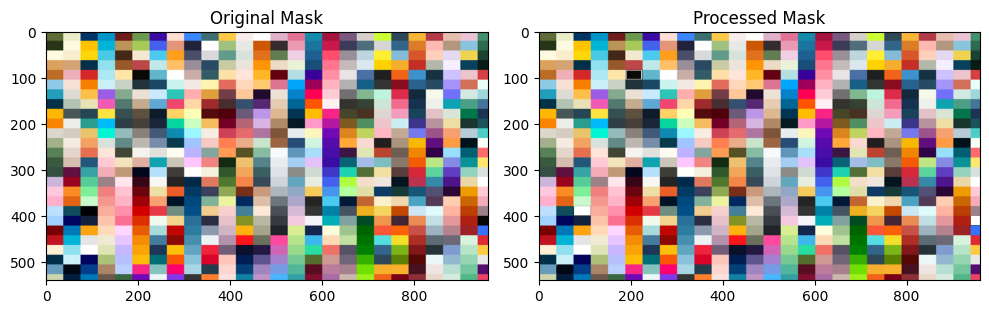

被濾掉的像素數量：4104，總像素數：518400（佔比：0.79%）


In [13]:

# 詢問使用者字體檔案路徑
# font_path_input = input("請輸入中文字體的檔案路徑: ")
font_path_input = "/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf"
print(font_path_input)
# 文字雲圖片遮罩檔案路徑
img_path = "./Mask_Image/Square_mask.png"

# 讀取遮罩圖片，轉換為 RGB，調整大小，然後轉換為 numpy 陣列
mask_color = np.array(Image.open(img_path).convert("RGB").resize((960, 540)))

print("mask_color.shape:", mask_color.shape)

# 查看 mask_color 的類型和屬性
print("Type of mask_color:", type(mask_color))
print("Shape of mask_color:", mask_color.shape)
print("Data type of mask_color:", mask_color.dtype)
# print("Attributes and methods of array:", dir(mask_color))

# 高精度尺寸圖適用
# # 每隔 n 個像素取一個像素
# mask_color = mask_color[::2, ::2]

# # 處理遮罩圖片 黑色區域不會生成圖片
mask_image = mask_color.copy()

# 顯示原始遮罩圖片
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask_image)
plt.title("Original Mask")

threshold = 10  # 根據圖片調整閾值
mask_image[np.all(mask_image < threshold, axis=2)] = 255

print("Processed mask shape:", mask_image.shape)

# 顯示處理後的遮罩圖片
plt.subplot(1, 2, 2)
plt.imshow(mask_image)
plt.title("Processed Mask")

plt.tight_layout()
plt.show()

# 打印被濾掉的像素數量
filtered_pixels = np.sum(np.all(mask_image == 255, axis=2))
total_pixels = mask_image.shape[0] * mask_image.shape[1]
print(f"被濾掉的像素數量：{filtered_pixels}，總像素數：{total_pixels}（佔比：{filtered_pixels/total_pixels*100:.2f}%）")

# # 邊緣檢測
# edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i] / 255., 2) for i in range(3)], axis=0)

# 邊緣檢測
edges = np.zeros_like(mask_color[:,:,0], dtype=np.float64)  # 創建一個與遮罩圖片同大小的零矩陣

for i in range(3):  # 遍歷RGB三個通道
    # 對每個通道應用高斯梯度幅值
    # 255.0 用於將像素值歸一化到 0-1 範圍
    # 2 是高斯核的標準差，控制邊緣檢測的敏感度
    gradient = gaussian_gradient_magnitude(mask_color[:,:,i] / 255.0, sigma=2)
    edges += gradient  # 累加每個通道的梯度

edges /= 3  # 取三個通道的平均值

# 將高於閾值的邊緣像素設為白色
mask_image[edges > 0.95] = 255

"""

AI answer: 待釐清

這個版本的代碼做了以下事情：

1. 創建一個與單個顏色通道相同大小的零矩陣。
2. 遍歷三個顏色通道（RGB）。
3. 對每個通道計算高斯梯度幅值。
4. 將每個通道的梯度累加到 `edges` 矩陣中。
5. 最後，將累加的結果除以 3 來獲得平均值。

這個方法實現了與原始代碼相同的功能，但避免了使用列表推導式和 `np.mean` 的 `axis` 參數，可能更容易理解每一步在做什麼。最後，仍然將高於閾值的邊緣像素設為白色，以在遮罩中突出顯示邊緣。


- 高斯梯度幅值越低 → 越可能是平滑區域（非邊緣）

- 高斯梯度幅值越高 → 越可能是邊緣

邊緣設為白色不就是不明顯了嗎？

您提出了一個很好的觀察。讓我解釋一下這個看似矛盾的做法的原因：

1. 在生成詞雲的上下文中，白色（255）通常代表可以放置文字的區域。

2. 將邊緣設為白色的目的不是為了在最終的詞雲中使邊緣更明顯，而是為了指導詞雲生成算法在哪裡可以放置文字。

3. 通過將邊緣設為白色，我們實際上是告訴詞雲生成器："這些是圖像的重要特徵，你可以在這些地方放置文字"。

4. 這樣做的結果是，文字會傾向於沿著原始圖像的輪廓和主要特徵分布，而不是隨機分布或覆蓋重要的視覺元素。

5. 在最終的詞雲中，這些邊緣不會直接可見，但它們會影響文字的排列方式，使得詞雲的整體形狀能夠反映原始圖像的輪廓。

所以，雖然在遮罩圖像中邊緣被設為白色看起來不明顯，但這實際上是為了在生成詞雲時保留原始圖像的結構和形狀。最終的效果是，生成的詞雲會呈現出原始圖像的大致輪廓，而不是完全忽視圖像的特徵。

如果您想要在最終的詞雲中使邊緣更加明顯，可以考慮相反的方法：將邊緣設為黑色或其他深色，這樣詞雲生成器就會避免在這些區域放置文字，從而在視覺上保留原始圖像的輪廓。

"""

# 將高於閾值的邊緣像素設為白色

# 顏色生成
image_colors = ImageColorGenerator(mask_image)
# image_colors.default_color = [0.9,0.9,0.9]


# 生成文字雲

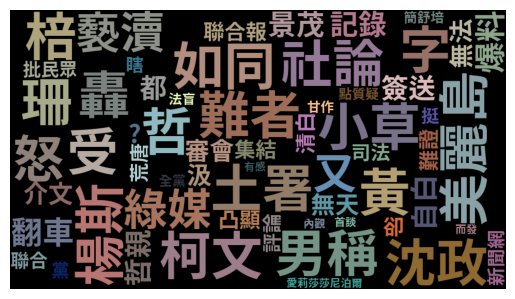

文字雲圖片已儲存為: ./img/20240916_柯文哲.png


In [15]:
# 生成文字雲

# wordcloud = WordCloud(font_path=font_path_input, width=320, height=320,max_font_size=50,max_words=4000,color_func=image_colors).generate_from_frequencies(word_count)
wordcloud = WordCloud(
    font_path=font_path_input,
    width=960,  # 增加寬度以提高畫質
    height=540,  # 增加高度以提高畫質
    mask=mask_image,
    max_font_size=100,  # 增加最大字體大小
    max_words=60,
    color_func=image_colors,
    prefer_horizontal=0.99,  # 90% 的詞水平放置
    scale=1,  # 增加縮放比例以提高畫質
    min_font_size=4,  # 設置最小字體大小
    background_color="black",  # 設置背景顏色
    mode="RGB",
    relative_scaling=0,  # 平衡詞頻和詞排名的重要性
    collocations=True,  # 包含常見詞組
    colormap="viridis",  # 使用 viridis 色彩映射
    contour_width=1,  # 添加輪廓以增強視覺效果
    contour_color="black"# 設置輪廓顏色
).generate_from_frequencies(word_count_dict)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# 儲存文字雲圖片 檔案名稱格式化
today = datetime.now().strftime('%Y%m%d')
image_filename = f"./img/{today}_{keyword}.png"
wordcloud.to_file(image_filename)
print(f"文字雲圖片已儲存為: {image_filename}")

您提出了一個很好的問題，這確實需要進一步澄清。您是對的，排名通常是基於詞頻的，但它們在詞雲生成中的作用略有不同。讓我解釋得更清楚：

1. 排名 vs 詞頻：
   - 排名：詞的相對位置（第1常見、第2常見等）
   - 詞頻：詞出現的實際次數

2. 差異的重要性：
   - 排名只反映相對順序，不顯示頻率差距
   - 詞頻反映實際出現次數，顯示詞與詞之間的差距

3. 舉例說明：
   假設有三個詞：
   - A：出現100次（排名1）
   - B：出現99次（排名2）
   - C：出現10次（排名3）

   - 純基於排名（0.0）：A、B、C的大小差異很小
   - 純基於詞頻（1.0）：A和B幾乎一樣大，C明顯小得多

4. `relative_scaling` 的作用：
   - 0.0：主要考慮排名，A、B、C大小差異不大
   - 1.0：完全按詞頻，A、B很大且相近，C很小
   - 0.5：平衡兩者，反映排名，也部分反映頻率差異

所以，雖然排名確實基於詞頻，但 `relative_scaling` 參數允許您決定是更注重詞的相對順序（排名），還是更注重詞之間的實際頻率差異。這提供了在視覺呈現上的靈活性。

# 其他小細節確認

In [ ]:
import os

print("Current working directory:", os.getcwd())
print("Font file exists:", os.path.exists(font_path_input))

Current working directory: /Users/larry/Github/Python-WordCloud
Font file exists: True
